In [2]:
!pip install seaborn --quiet

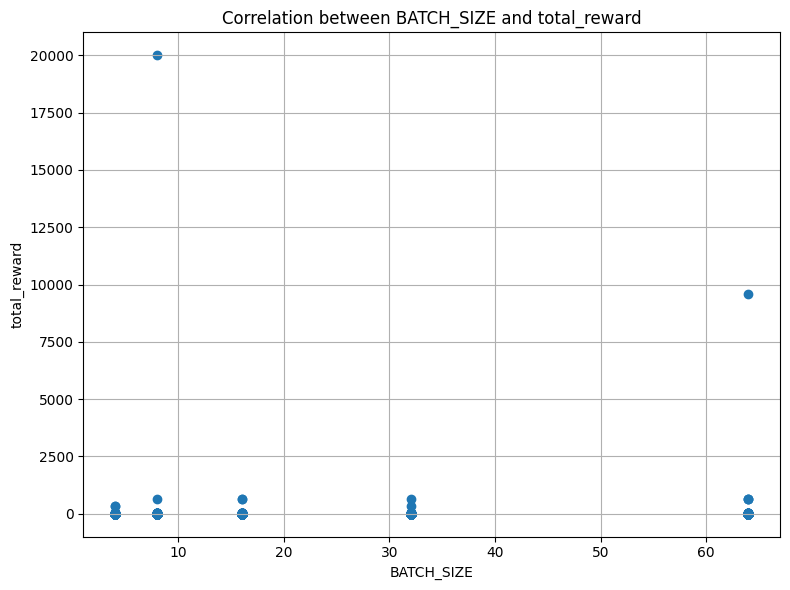

Error: Parameter 'BEST_EPOCHS' or reward 'total_reward' not found in data.


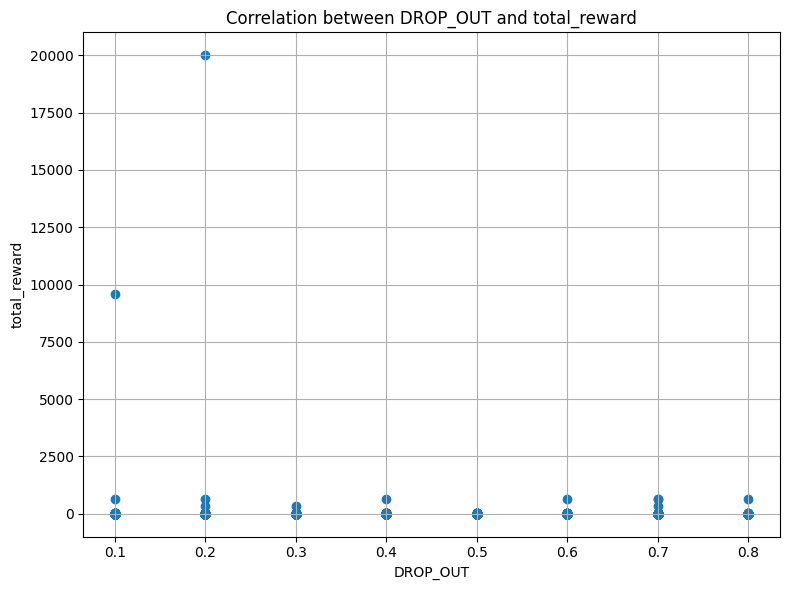

In [17]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # For nicer plots (optional)

def visualize_parameter_correlation(filepath, parameter_name, reward_name="total_reward"):
    """
    Visualizes the correlation between a parameter and the total reward.

    Args:
        filepath: Path to the JSON file.
        parameter_name: The name of the parameter to visualize.
        reward_name: The name of the reward metric (default: "total_reward").
    """
    try:
        with open(filepath, 'r') as f:
            data = json.load(f)

        df = pd.DataFrame(data)  # Create a Pandas DataFrame

        if parameter_name not in df.columns or reward_name not in df.columns:
            print(f"Error: Parameter '{parameter_name}' or reward '{reward_name}' not found in data.")
            return

        # Convert parameter values to numeric if possible (for scatter plots)
        if pd.api.types.is_object_dtype(df[parameter_name]): # Check if object dtype (string)
            try:
                df[parameter_name] = pd.to_numeric(df[parameter_name]) # Try converting
            except ValueError:
                print(f"Parameter '{parameter_name}' is not numeric, will use box plot")


        plt.figure(figsize=(8, 6))

        if pd.api.types.is_numeric_dtype(df[parameter_name]): # Check if numeric after possible conversion
            # Scatter plot for numeric parameters
            plt.scatter(df[parameter_name], df[reward_name])
            plt.xlabel(parameter_name)
            plt.ylabel(reward_name)
            plt.title(f"Correlation between {parameter_name} and {reward_name}")
        else:
            # Box plot for categorical parameters
            sns.boxplot(x=df[parameter_name], y=df[reward_name]) # Use seaborn for boxplot
            plt.xlabel(parameter_name)
            plt.ylabel(reward_name)
            plt.title(f"{reward_name} distribution for different values of {parameter_name}")

        plt.grid(True)
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()

    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Error: {e}")
    except Exception as e: # Catch other potential errors (e.g., plotting errors)
        print(f"An error occurred: {e}")


# Example usage:
filepath = '2025-02-13-03:05:51.json'  # Replace with your file path

# Visualize correlation for different parameters
parameters_to_visualize = ["BATCH_SIZE", "BEST_EPOCHS", "DROP_OUT"]  # Add all your parameter names
# ["SEQ_LENGTH", "LSTM_UNIT", "BATCH_SIZE", "BEST_EPOCHS", "DROP_OUT"] 
for param in parameters_to_visualize:
    visualize_parameter_correlation(filepath, param)

# Example to visualize a specific parameter:
# visualize_parameter_correlation(filepath, "LSTM_UNIT")

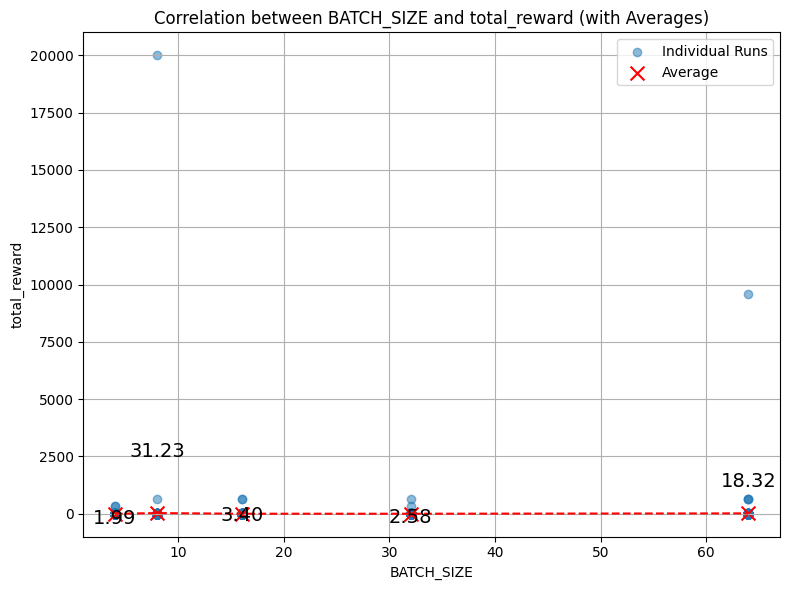

Error: Parameter 'BEST_EPOCHS' or reward 'total_reward' not found.


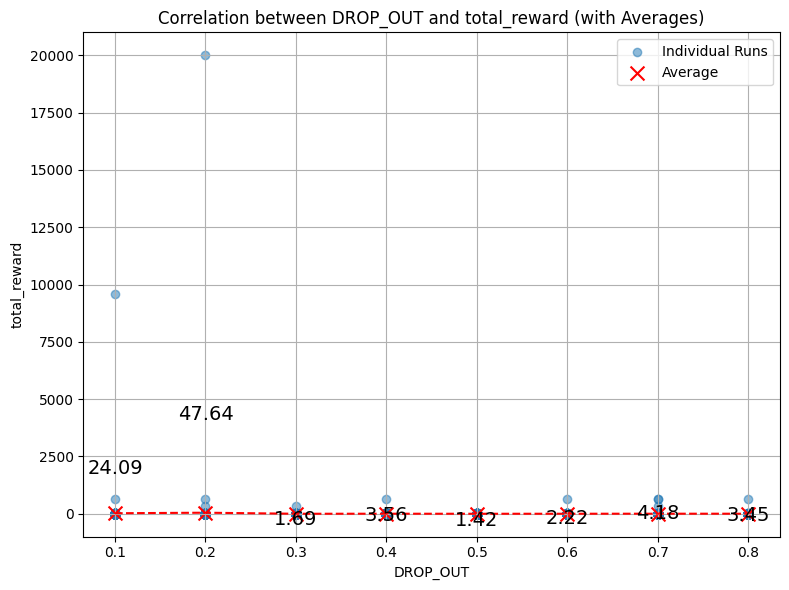

In [33]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def visualize_parameter_correlation_with_averages(filepath, parameter_name, reward_name="total_reward"):
    """
    Visualizes correlation with averages for each parameter value.
    """
    try:
        with open(filepath, 'r') as f:
            data = json.load(f)

        df = pd.DataFrame(data)

        if parameter_name not in df.columns or reward_name not in df.columns:
            print(f"Error: Parameter '{parameter_name}' or reward '{reward_name}' not found.")
            return

        # Group by parameter and calculate average reward
        average_df = df.groupby(parameter_name)[reward_name].mean().reset_index()

        plt.figure(figsize=(8, 6))

        if pd.api.types.is_numeric_dtype(df[parameter_name]):
            # Scatter plot with averages
            plt.scatter(df[parameter_name], df[reward_name], label="Individual Runs", alpha=0.5)  # Individual points
            plt.scatter(average_df[parameter_name], average_df[reward_name], color='red', label="Average", marker='x', s=100)  # Averages
            plt.plot(average_df[parameter_name], average_df[reward_name], color='red', linestyle='--') # Connect average points

            for x, y in zip(average_df[parameter_name], average_df[reward_name]):
                plt.text(x, y * 100, f"{y:.2f}", ha='center', va='top', fontsize=14, color='black')  # Format to 2 decimal places
            plt.xlabel(parameter_name)
            plt.ylabel(reward_name)
            plt.title(f"Correlation between {parameter_name} and {reward_name} (with Averages)")
            plt.legend()  # Show the legend

        else:
            # Box plot with average overlaid
            sns.boxplot(x=df[parameter_name], y=df[reward_name])
            plt.scatter(average_df[parameter_name], average_df[reward_name], color='red', label="Average", marker='x', s=100)  # Overlaid averages
            plt.xlabel(parameter_name)
            plt.ylabel(reward_name)
            plt.title(f"{reward_name} distribution for different values of {parameter_name} (with Averages)")
            plt.legend()

        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")



# Example usage:
filepath = '2025-02-13-03:05:51.json'  # Replace with your file path

# Visualize correlation for different parameters
parameters_to_visualize = ["BATCH_SIZE", "BEST_EPOCHS", "DROP_OUT"]
for param in parameters_to_visualize:
    visualize_parameter_correlation_with_averages(filepath, param)

# Filter 0 value

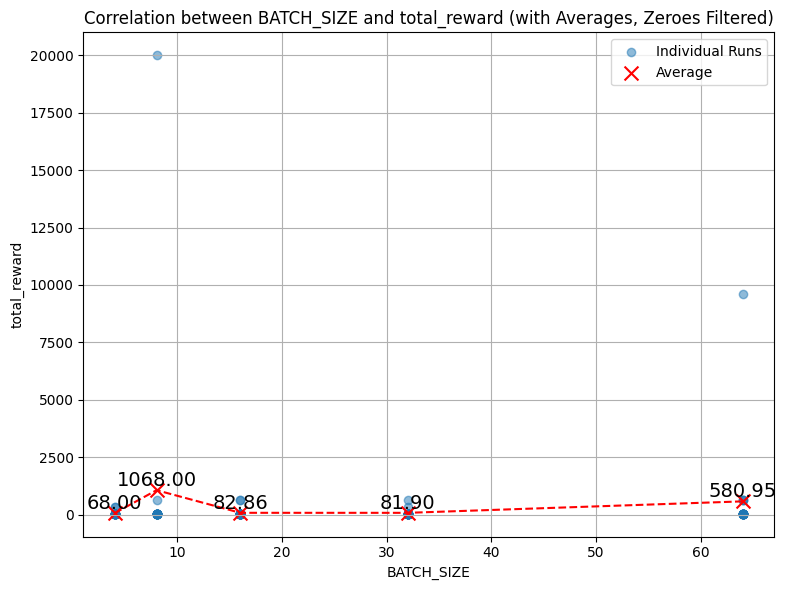

Error: Parameter 'BEST_EPOCHS' or reward 'total_reward' not found.


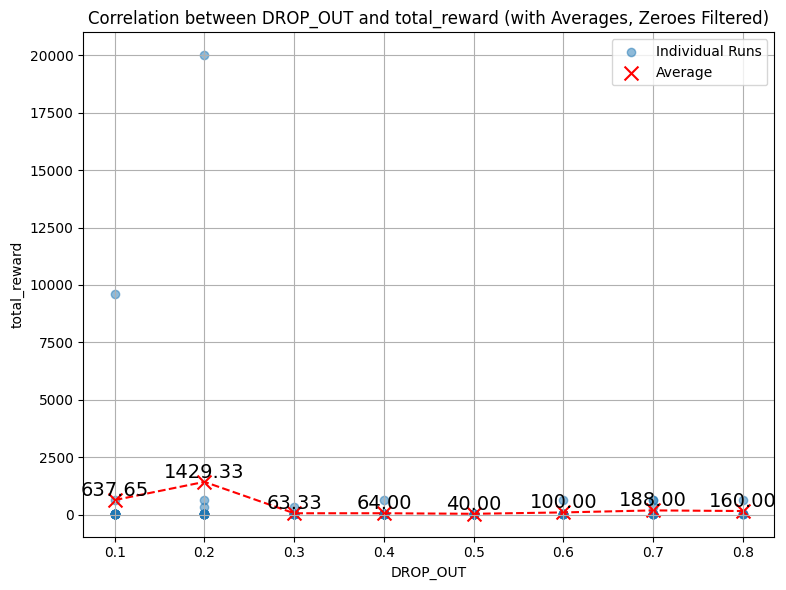

In [34]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def visualize_parameter_correlation_with_averages(filepath, parameter_name, reward_name="total_reward"):
    """Visualizes correlation with averages, filtering out zero reward values."""

    try:
        with open(filepath, 'r') as f:
            data = json.load(f)

        df = pd.DataFrame(data)

        if parameter_name not in df.columns or reward_name not in df.columns:
            print(f"Error: Parameter '{parameter_name}' or reward '{reward_name}' not found.")
            return

        # Filter out zero reward values
        df = df[df[reward_name] != 0]  # Keep only rows where reward is NOT 0


        if df.empty: # Check if the dataframe is empty after filtering
            print(f"No non-zero reward values found for parameter: {parameter_name}")
            return

        average_df = df.groupby(parameter_name)[reward_name].mean().reset_index()

        plt.figure(figsize=(8, 6))

        if pd.api.types.is_numeric_dtype(df[parameter_name]):
            plt.scatter(df[parameter_name], df[reward_name], label="Individual Runs", alpha=0.5)
            plt.scatter(average_df[parameter_name], average_df[reward_name], color='red', label="Average", marker='x', s=100)
            plt.plot(average_df[parameter_name], average_df[reward_name], color='red', linestyle='--')

            for x, y in zip(average_df[parameter_name], average_df[reward_name]):
                plt.text(x, y , f"{y:.2f}", ha='center', va='bottom', fontsize=14, color='black')  # va changed to bottom

            plt.xlabel(parameter_name)
            plt.ylabel(reward_name)
            plt.title(f"Correlation between {parameter_name} and {reward_name} (with Averages, Zeroes Filtered)")
            plt.legend()

        else:  # Categorical parameter
            sns.boxplot(x=df[parameter_name], y=df[reward_name])
            plt.scatter(average_df[parameter_name], average_df[reward_name], color='red', label="Average", marker='x', s=100)
            plt.xlabel(parameter_name)
            plt.ylabel(reward_name)
            plt.title(f"{reward_name} distribution for different values of {parameter_name} (with Averages, Zeroes Filtered)")
            plt.legend()

        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")



# Example usage (same as before):
filepath = '2025-02-13-03:05:51.json'  # Replace with your file path
parameters_to_visualize = ["BATCH_SIZE", "BEST_EPOCHS", "DROP_OUT"]
for param in parameters_to_visualize:
    visualize_parameter_correlation_with_averages(filepath, param)